# 사이킷런(scikit-learn) 시작

![scikit-learn logo.png](https://drive.google.com/uc?id=1Aeb0mBJzYgz7UGmHAdGsQJF44EM9mNTD)

In [1]:
# version scikit_learn-1.2.0
# Colab : 이미 설치 되어있음

# 방법1
#python venv -m ml
!pip3 install scikit-learn

# 방법2
# conda create ml
# conda install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode-beta.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


## scikit-learn 특징

- 다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리
- 심플하고 일관성 있는 API, 유용한 온라인 문서, 풍부한 예제
- 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공
- 다양한 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공
- 많은 사람들이 사용하며 다양한 환경에서 검증된 라이브러리

## scikit-learn 주요 모듈

| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
||Data Cleasing & Feature Engineering
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
||모형 성능 평가와 개선|
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
||지도학습(Supervised Learning) 알고리즘|
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
||비지도학습(Unsupervised Learning) 알고리즘|
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

### API 사용 방법

1. Scikit-Learn으로부터 적절한 `estimator` 클래스를 임포트해서 모델의 클래스 선택
2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
3. 데이터를 특징 배열과 대상 벡터로 배치
4. 모델 인스턴스의 `fit()` 메서드를 호출해 모델을 데이터에 적합
5. 모델을 새 데이터에 대해서 적용
  + 지도 학습: 대체로 `predict()` 메서드를 사용해 알려지지 않은 데이터에 대한 레이블 예측
  + 비지도 학습: 대체로 `transform()`이나 `predict()` 메서드를 사용해 데이터의 속성을 변환하거나 추론

![scikit-learn](https://scikit-learn.org/stable/_static/ml_map.png)

In [2]:
# 참고 
# https://wikidocs.net/179314 자연어 처리를 위한 딥러닝 입문
# https://datascienceschool.net/intro.html
# 판다스데이터 분석 오승환
# kaggle책
# [국내도서] 핸즈온 머신러닝 2판
# [국내도서] 머신 러닝 교과서 with 파이썬, 사이킷런, 텐서플로
# [국내도서] 단단한 머신러닝


### API 사용 예제

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])# 테머

/tmp/ipykernel_298/3012953313.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])# 테머


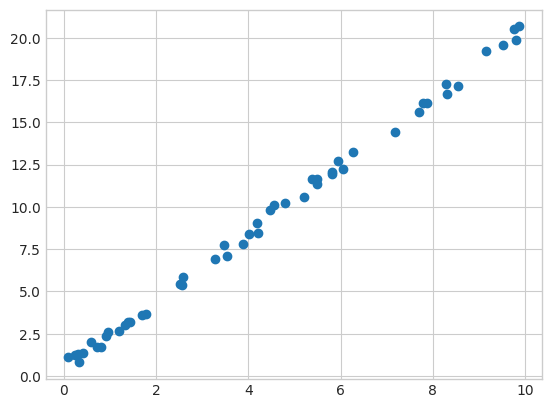

In [6]:
x = 10 * np.random.rand(50) # 정규분포에서 난수 생성후 10을 곱해줌
y = 2 * x + np.random.rand(50) # x에 2를 곱한다음 + 난수를 더해준다(noise)
# y = 2 * x # 기울기가 2인 직선
plt.scatter(x, y)

# 머신러닝 모델링 과정
```
데이터 전처리 -> 데이터 셋 분리 -> 모델생성 및 학습 -> 예측 수행 -> 평가
- 데이터 전처리 : 불필요한 column 을 제거, 데이터를 변환, nan을 제거 또는 대치
- 데이터셋 분리 : 학습데이터, 검증데이터
- 모델 생성 : sklearn api -> model 객체 생성 
- 학습 : model.fit()
- 예측 : model.predict(data) -> 예측값
- 평가 : 실제모델이 어느정도의 성능을 갖고있는가 측젗
```

#### Scikit-Learn의 기본 API 사용 순서

In [34]:
# Regression

In [4]:
import numpy as np
import pandas as pd

In [8]:
# 1. linearregression model을 import 
from sklearn.linear_model import LinearRegression 

In [9]:
# 2. model 객체 생성, model의 하이퍼 파라미터 선택
model = LinearRegression(fit_intercept=True)

In [11]:
model?

Type:        LinearRegression
String form: LinearRegression()
File:        /mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/linear_model/_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to

In [15]:
# 학습시킬 dataset의 shape을 확인
x.shape
# x의 shape이 vector 형태가 아니므로 vector 로 변경해준다.
X = x.reshape((50,1))

In [17]:
# X는 x를 vector형태로 변경한 데이터
X.shape


(50, 1)

In [14]:
y.shape

(50,)

In [21]:
# model 학습
model.fit(X, y) # 지도학습이므로 data와 정답을 함께 입력

LinearRegression()

In [22]:
model.coef_ # 회귀계수, 기울기

array([2.00797602])

In [23]:
model.intercept_ # y 절편의 값

0.4315042452438167

In [25]:
# 학습된 model에 학습시킨 데이터를 다시 넣어 확인
y_predict = model.predict(X)

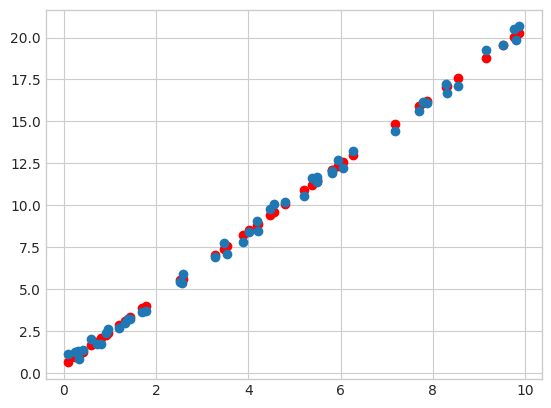

In [27]:
plt.scatter(x, y_predict, c="r")
plt.scatter(x, y)

In [28]:
import numpy as np

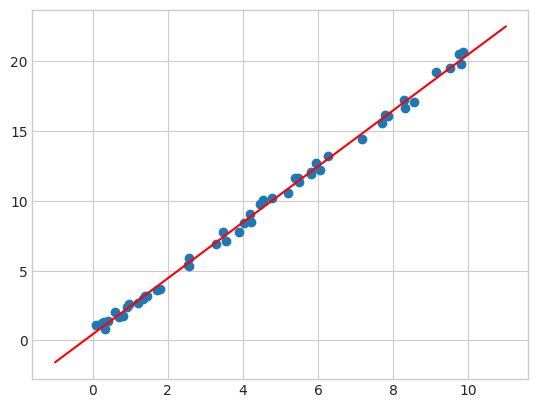

In [33]:
x_test = np.linspace(-1,11, 100) # -1 부터 11까지 데이터 추출
x_test = x_test.reshape((100,1))
y_test = model.predict(x_test)
plt.plot(x_test, y_test, c="r")
plt.scatter(x, y)

In [ ]:
# 실습 - 유방암 데이터를 이용한 분류 모델 

In [35]:
from sklearn.datasets import load_breast_cancer
load_breast_cancer?

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://goo.gl/U2Uwz2

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    appropriate dtypes (numeri

In [36]:
breast_cancer = load_breast_cancer() # 함수를 실행하여 dataset load

In [39]:
breast_cancer.data #dataset

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [40]:
breast_cancer.target #Label Data(Target Data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [45]:
# 총 569개의 데이터, 30개의 특징
# 이미 vector 
print(breast_cancer.data.shape)

# 총 569개의 Label Data
print(breast_cancer.target.shape)

# 30개의 특징에 대한 feature의 정보
print(breast_cancer.feature_names)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [47]:
import pandas as pd

In [48]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [54]:
# null 값 확인, object type 확인
data.info()

data.shape

data.head()

data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64

In [55]:
data["target"] = breast_cancer.target

In [59]:
# 0 과 1로 존재
data["target"].nunique()
set(data["target"])

{0, 1}

In [61]:
# 데이터의 분포
data["target"].mean() # target 값이 1인 데이터에 대한 분포를 알수있다. 
# target =1 인 데이터가 62% 존재한다. 

0.6274165202108963

In [62]:
# 데이터 전처리1
# input data(특성 데이터)와 Label data(정답 데이터)를 분리
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]
print(x_data.shape)
print(y_data.shape)

(569, 30)
(569,)


In [63]:
# model 생성
# LogisticRegression 은 2진 분류 모델이다. 
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_data, y_data)

/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# 94% 의 정확도를 보여주고 있다. 
(model_1.predict(x_data) == y_data).mean()

0.9490333919156415

In [75]:
# data를 학습 -> data로 평가 :like 연습문제에서 시험이 다 출제됨
# data 를 분리 한다. 8:2로 분리해서, train data와 valid data로 분리
# x_train : 연습문제
# x_vaild : 모의고사
# 실제 데이터 : 수능시험

# data.iloc[:int(568*0.8), :-1] #train dataset
# data.iloc[int(568*0.8):, :-1] # test dataset

from sklearn.model_selection import train_test_split
x_train, x_vaild, y_train, y_vaild = train_test_split(x_data, y_data, test_size =0.2)


In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_vaild.shape)
print(y_vaild.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [77]:
model_2 = LogisticRegression()
model_2.fit(x_train, y_train)

/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
(model_2.predict(x_vaild) == y_vaild).mean()
# 90%정확도를 갖고 있다. 

0.9035087719298246

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_vaild, model_2.predict(x_vaild))
# accuracy_score 를 이용한 정확도 평가

0.9035087719298246

In [93]:
# 확률로 값을 예측
model_1.predict_proba(x_vaild)[:, 0] # 결과가 0일 예측 확률
# model_1.predict_proba(x_vaild)[:, 1] # 결과가 1일 예측 확률
# model_1.predict_proba(x_vaild)[:, 0] + model_1.predict_proba(x_vaild)[:, 1] # 더하면 항상 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 예제 데이터 세트

### 분류 또는 회귀용 데이터 세트

| API | 설명 |
|-----|------|
| `datasets.load_boston()` | 미국 보스턴의 집에 대한 특징과 가격 데이터 (회귀용) |
| `datasets.load_breast_cancer()` | 위스콘신 유방암 특징들과 악성/음성 레이블 데이터 (분류용) |
| `datasets.load_diabetes()` | 당뇨 데이터 (회귀용) |
| `datasets.load_digits()` | 0에서 9까지 숫자 이미지 픽셀 데이터 (분류용) |
| `datasets.load_iris()` | 붓꽃에 대한 특징을 가진 데이터 (분류용) |

### 온라인 데이터 세트

* 데이터 크기가 커서 온라인에서 데이터를 다운로드 한 후에 불러오는 예제 데이터 세트

| API | 설명 |
|-----|------|
| `fetch_california_housing()` | 캘리포니아 주택 가격 데이터 |
| `fetch_covtype()` | 회귀 분석용 토지 조사 데이터 |
| `fetch_20newsgroups()` | 뉴스 그룹 텍스트 데이터 |
| `fetch_olivetti_faces()` | 얼굴 이미지 데이터 |
| `fetch_lfw_people()` | 얼굴 이미지 데이터 |
| `fetch_lfw_paris()` | 얼굴 이미지 데이터 |
| `fetch_rcv1()` | 로이터 뉴스 말뭉치 데이터 |
| `fetch_mldata()` | ML 웹사이트에서 다운로드 |

### 분류와 클러스터링을 위한 표본 데이터 생성

| API | 설명 |
|-----|------|
| `datasets.make_classifications()` | 분류를 위한 데이터 세트 생성. 높은 상관도, 불필요한 속성 등의 노이즈를 고려한 데이터를 무작위로 생성 |
| `datasets.make_blobs()` | 클러스터링을 위한 데이터 세트 생성. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 셋트를 무작위로 생성 |